In [9]:
import random, time
import numpy as np
from math import exp
import matplotlib.pyplot as plt

In [ ]:
def gerar_tabuleiro():
    """vamos gerar um tabuleiro aleatório para o problema """
    return [random.randint(0, 7) for _ in range(8)]

def gerar_vizinhos(tabuleiro):
    """temos que gerar todos os vizinhos possíveis alterando a posição de só uma rainha"""
    vizinhos = []
    for coluna in range(len(tabuleiro)):
        for linha in range(len(tabuleiro)):
            if tabuleiro[coluna] != linha:
                vizinho = tabuleiro.copy()
                vizinho[coluna] = linha
                vizinhos.append(vizinho)
    return vizinhos

def contar_conflitos(tabuleiro):
    """contamos o número de conflitos no tabuleiro  """
    conflitos = 0
    n = len(tabuleiro)
    
    for i in range(n):
        for j in range(i + 1, n):
            if tabuleiro[i] == tabuleiro[j] or abs(tabuleiro[i] - tabuleiro[j]) == abs(i - j):
                conflitos += 1
    return conflitos

In [3]:
def hill_climbing(tabuleiro_inicial):
    """ algoritmo de Hill climbing"""
    estado_atual = tabuleiro_inicial
    iteracoes = 0
    
    while True:
        iteracoes += 1
        vizinhos = gerar_vizinhos(estado_atual)
        conflitos_atuais = contar_conflitos(estado_atual)
        
        melhor_vizinho = None
        melhor_conflito = float('inf')
        
        for vizinho in vizinhos:
            conflitos = contar_conflitos(vizinho)
            if conflitos < melhor_conflito:
                melhor_conflito = conflitos
                melhor_vizinho = vizinho
                
        if melhor_conflito >= conflitos_atuais:
            break
        
        estado_atual = melhor_vizinho
        
    return estado_atual, iteracoes

In [4]:
def simulated_annealing(tabuleiro_inicial, temp_inicial=250, taxa_resfriamento=0.99, max_iter=50000):
    """executa aqui o algoritmo de Simulated Annealng"""
    estado_atual = tabuleiro_inicial
    temperatura = temp_inicial
    historico_temp = [temperatura]
    iteracoes = 0

    while temperatura > 0.01 and iteracoes < max_iter:
        iteracoes += 1
        vizinhos = gerar_vizinhos(estado_atual)
        proximo_estado = random.choice(vizinhos)
        
        delta_conflitos = contar_conflitos(proximo_estado) - contar_conflitos(estado_atual)
        
        if delta_conflitos < 0 or random.random() < exp(-delta_conflitos / temperatura):
            estado_atual = proximo_estado
            
        temperatura *= taxa_resfriamento
        historico_temp.append(temperatura)
        
        if contar_conflitos(estado_atual) == 0:
            break
            
    return estado_atual, historico_temp, iteracoes

In [5]:
def rodar_experimentos(qtd_experimentos=1000):
    """podemos executar múltiplos experimentos """
    resultados = {
        "hill_climbing": {"sucesso": 0, "tempos": [], "iteracoes": [], "conflitos": []},
        "simulated_annealing": {"sucesso": 0, "tempos": [], "iteracoes": [], "conflitos": []}
    }
    
    for i in range(qtd_experimentos):
        if (i+1) % 50 == 0:
            print(f"Executando experimento {i+1}/{qtd_experimentos}...")
        
        tabuleiro_inicial = gerar_tabuleiro()
        
        # Hill climbing
        inicio = time.time()
        solucao_hc, iteracoes_hc = hill_climbing(tabuleiro_inicial)
        tempo_hc = time.time() - inicio
        conflitos_hc = contar_conflitos(solucao_hc)
        
        resultados["hill_climbing"]["tempos"].append(tempo_hc)
        resultados["hill_climbing"]["iteracoes"].append(iteracoes_hc)
        resultados["hill_climbing"]["conflitos"].append(conflitos_hc)
        
        if conflitos_hc == 0:
            resultados["hill_climbing"]["sucesso"] += 1
        
        # simulated Annealing
        inicio = time.time()
        solucao_sa, _, iteracoes_sa = simulated_annealing(tabuleiro_inicial)
        tempo_sa = time.time() - inicio
        conflitos_sa = contar_conflitos(solucao_sa)
        
        resultados["simulated_annealing"]["tempos"].append(tempo_sa)
        resultados["simulated_annealing"]["iteracoes"].append(iteracoes_sa)
        resultados["simulated_annealing"]["conflitos"].append(conflitos_sa)
        
        if conflitos_sa == 0:
            resultados["simulated_annealing"]["sucesso"] += 1
    
    return resultados

In [6]:
def exibir_resultados(resultados, qtd_experimentos):
    for metodo in resultados.keys():
        sucesso = resultados[metodo]["sucesso"] / qtd_experimentos * 100
        media_tempo = np.mean(resultados[metodo]["tempos"])
        media_iteracoes = np.mean(resultados[metodo]["iteracoes"])
        media_conflitos = np.mean(resultados[metodo]["conflitos"])
        min_conflitos = np.min(resultados[metodo]["conflitos"])
        max_conflitos = np.max(resultados[metodo]["conflitos"])
        
        print(f"\n--- {metodo.replace('_', ' ').title()} ---")
        print(f"Taxa de Sucesso: {sucesso:.2f}%")
        print(f"Tempo Médio de Execução: {media_tempo:.6f} segundos")
        print(f"Média de Iterações: {media_iteracoes:.2f}")
        print(f"Média de Conflitos Restantes: {media_conflitos:.2f}")
        print(f"Menor Número de Conflitos: {min_conflitos}")
        print(f"Maior Número de Conflitos: {max_conflitos}")

In [7]:
# seta o número de vezes que vc quer rodar
qtd_experimentos = 500 
resultados = rodar_experimentos(qtd_experimentos)
exibir_resultados(resultados, qtd_experimentos)

Executando experimento 50/500...
Executando experimento 100/500...
Executando experimento 150/500...
Executando experimento 200/500...
Executando experimento 250/500...
Executando experimento 300/500...
Executando experimento 350/500...
Executando experimento 400/500...
Executando experimento 450/500...
Executando experimento 500/500...

--- Hill Climbing ---
Taxa de Sucesso: 18.00%
Tempo Médio de Execução: 0.000568 segundos
Média de Iterações: 4.23
Média de Conflitos Restantes: 1.20
Menor Número de Conflitos: 0
Maior Número de Conflitos: 3

--- Simulated Annealing ---
Taxa de Sucesso: 46.60%
Tempo Médio de Execução: 0.010669 segundos
Média de Iterações: 902.84
Média de Conflitos Restantes: 0.55
Menor Número de Conflitos: 0
Maior Número de Conflitos: 2


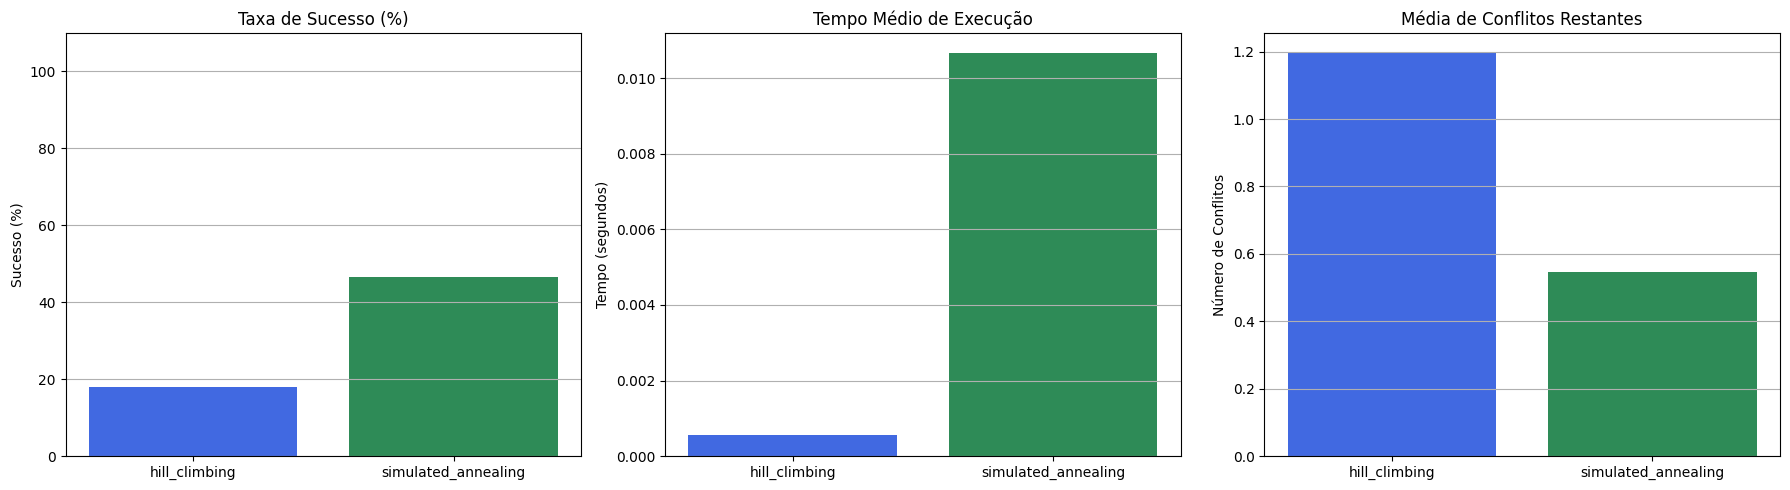

In [10]:
def plotar_graficos(resultados, qtd_experimentos):
    """podemos fazer uma comparação entre os gráficos de Hill Climbing e Simulated Annealing"""
    
    metodos = list(resultados.keys())
    
    sucesso = [resultados[m]["sucesso"] / qtd_experimentos * 100 for m in metodos]
    tempo_medio = [np.mean(resultados[m]["tempos"]) for m in metodos]
    media_conflitos = [np.mean(resultados[m]["conflitos"]) for m in metodos]
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    # Sucesso
    axs[0].bar(metodos, sucesso, color=['royalblue', 'seagreen'])
    axs[0].set_title('Taxa de Sucesso (%)')
    axs[0].set_ylim(0, 110)
    axs[0].set_ylabel('Sucesso (%)')
    axs[0].grid(axis='y')
    
    #Tempo Médio
    axs[1].bar(metodos, tempo_medio, color=['royalblue', 'seagreen'])
    axs[1].set_title('Tempo Médio de Execução')
    axs[1].set_ylabel('Tempo (segundos)')
    axs[1].grid(axis='y')
    
    # Conflitos Médios
    axs[2].bar(metodos, media_conflitos, color=['royalblue', 'seagreen'])
    axs[2].set_title('Média de Conflitos Restantes')
    axs[2].set_ylabel('Número de Conflitos')
    axs[2].grid(axis='y')
    
    plt.tight_layout()
    plt.show()

plotar_graficos(resultados, qtd_experimentos)